In [1]:
%load_ext autoreload
%autoreload 2
import os
import matplotlib.pyplot as plt
import os
import pandas as pd
from amftrack.util.sys import get_analysis_folders,get_time_plate_info_long_from_analysis,get_time_plate_info_from_analysis,get_time_hypha_info_from_analysis,get_global_hypha_info_from_analysis 
import numpy as np
import imageio
import os
import cv2
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit
from amftrack.pipeline.final_analysis.density_wave import get_wave_fit, S, dS, wave, dwave,plot_single_plate
import matplotlib.patches as mpatches
import statsmodels.api as sm
from amftrack.pipeline.final_analysis.hypha_speed_analysis import *
import scipy
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import scipy.io as sio
import matplotlib as mpl
from matplotlib.path import Path
from matplotlib.patches import PathPatch
from matplotlib.legend_handler import HandlerTuple
from amftrack.util.plot import gridplot
import logging
logging.getLogger().setLevel(logging.WARNING)
# plt.style.use('presentation.mplstyle')

%matplotlib widget

c:\users\coren\documents\phd\code\amftrack\amftrack\util\dbx.py:3: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
all_analysis_folders = get_analysis_folders()
plates = [
    "52_20220707",
    "56_20220701",
    "59_20201126",
    "69_20201119",
    "76_20210108",
    "81_20220704",
    "84_20220621",
    "94_20201123",
    "102_20201226",
    "152_20201224",
    "792_20210915",
    "1076_20220511",
    "941_20220404"
]
plates = [
# "3_20220426",
# "12_20220502",
# "13_20220422",
# "16_20220419",
# "21_20220502",
# "480_20221205",
"28_20230227",
"206_20230303",
"202_20230314",
"218_20230227",
"219_20230307",
"229_20230330",
# "240_20230328"
]
analysis_folders = all_analysis_folders.loc[all_analysis_folders['unique_id'].isin(plates)]
folders,time_plate_info = get_time_plate_info_from_analysis(analysis_folders,use_saved=False)
folders,time_plate_info_long = get_time_plate_info_long_from_analysis(analysis_folders,use_saved=False)
time_plate_info = time_plate_info.replace(-1.0,np.nan)
time_plate_info_long = time_plate_info_long.replace(-1.0,np.nan)
width = 1.6
height = 1
# folders, time_hypha_info = get_time_hypha_info_from_analysis(analysis_folders,use_saved=False)
# folders,global_hypha_info = get_global_hypha_info_from_analysis(analysis_folders,use_saved=False)

In [3]:
plates = [
# "3_20220426",
# "12_20220502",
# "13_20220422",
# "16_20220419",
# "21_20220502",
# "480_20221205",
"28_20230227",
"206_20230303",
"202_20230314",
"218_20230227",
"219_20230307",
"229_20230330",
# "240_20230328"
]

In [4]:
time_plate_info["density"] = time_plate_info["tot_length_study"]/time_plate_info["area_sep_comp"]

In [5]:
timestep = {32:100,28:60,30:80,1014: 80, 1023:60, 1037:70, 1042:100,52 : 65,56:50,938:30,1076:60,84:80,89:80,91:70,127:60,129:50,94:150,152:35,792:60,1048:60,1045:50,941:50}
timestep2 = {102:25,83:70,76:20,81:70,32:100,28:60,30:80,1014: 80, 1023:60, 1037:70, 1042:100,52 : 75,56:50,938:30,1076:60,84:80,89:80,91:70,127:60,129:50,94:100,152:35,792:50,1048:60,1045:50}
timestep = {**timestep, **timestep2}
timestep2 = {1014 : 80,1024:25,1027:18,1028:60,1030 : 60,1032 : 50,1042 : 120,1048:70,127:120,129:60,130:50,991:40}
timestep = {**timestep, **timestep2}
timestep2 = {1023 : 60,1031:30,1035:30,1037 : 80,1039 : 90,1045:70,1047:50,1053:40}
timestep = {**timestep, **timestep2}    

timestep2 = {1071 : 25,1076:70,839:60,938 : 35}
timestep = {**timestep, **timestep2}
timestep2 = {30 : 62,32 : 160,33:80}
timestep = {**timestep, **timestep2}
timestep2 = {799 : 100,800 : 25,91:100,99:40}
timestep = {**timestep, **timestep2}
timestep2 = {3:144,16 : 39, 12:70,480:150,28 : 100}
timestep = {**timestep, **timestep2}
timestep2 = {3:144,16 : 39, 12:70,480:150,28 : 100,206 : 90,202 : 175}
timestep = {**timestep, **timestep2}

In [11]:
select.columns

Index(['num_trunks', 'area', 'area_sep_comp', 'num_tips', 'num_nodes',
       'area_study', 'num_tips_study', 'num_nodes_study', 'num_edges_study',
       'tot_length', 'tot_length_study', 'out_study', 'mean_straightness',
       'spore_volume', 'num_spores', 'tot_biovolume_study', 'tot_biovolume',
       'date', 'Plate', 'path_exp', 'folder_analysis', 'time_since_begin',
       'time_since_begin_h', 'timestep', 'folder', 'unique_id', 'datetime',
       'PrincePos', 'root', 'strain', 'medium',
       'ring_biovolume_density_incr-100_index-0',
       'ring_biovolume_density_incr-100_index-1',
       'ring_biovolume_density_incr-100_index-2',
       'ring_biovolume_density_incr-100_index-3',
       'ring_biovolume_density_incr-100_index-4',
       'ring_biovolume_density_incr-100_index-5',
       'ring_biovolume_density_incr-100_index-6',
       'ring_biovolume_density_incr-100_index-7',
       'ring_biovolume_density_incr-100_index-8',
       'ring_biovolume_density_incr-100_index-9',
 

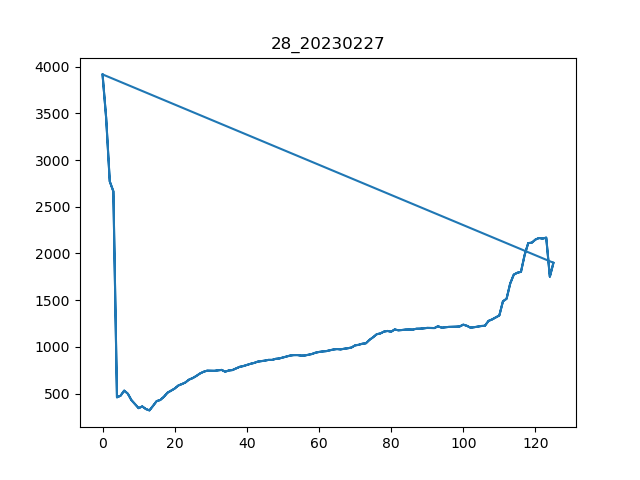

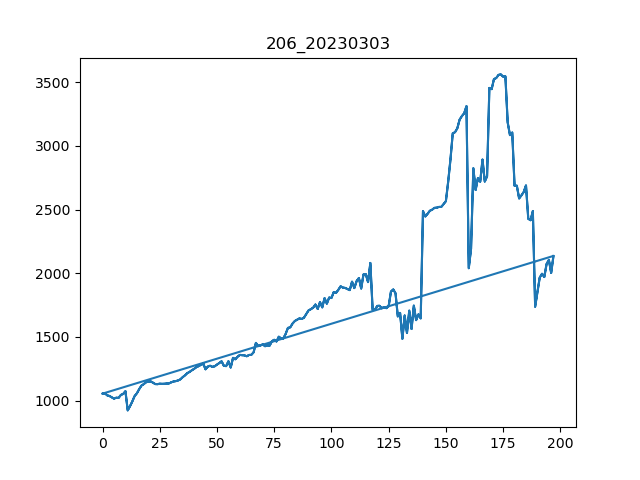

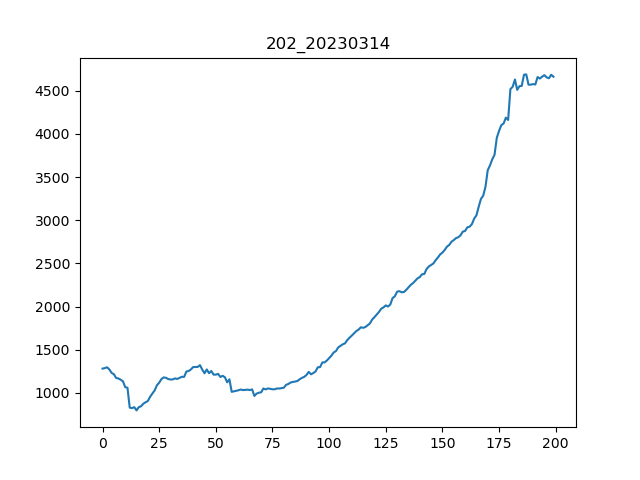

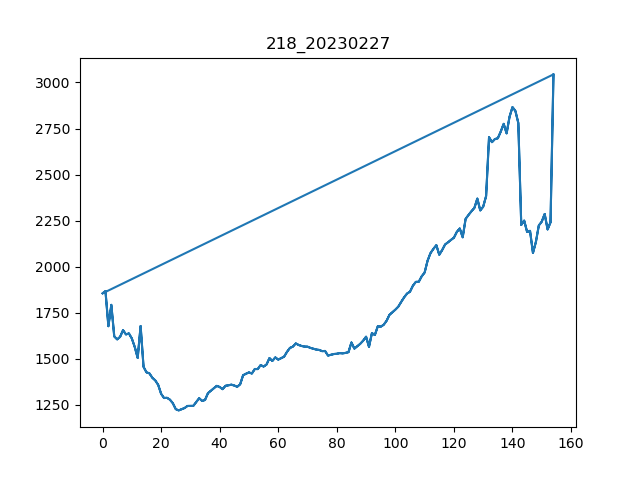

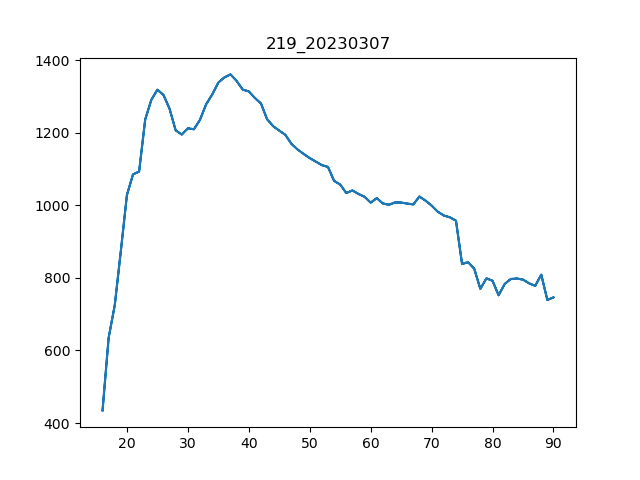

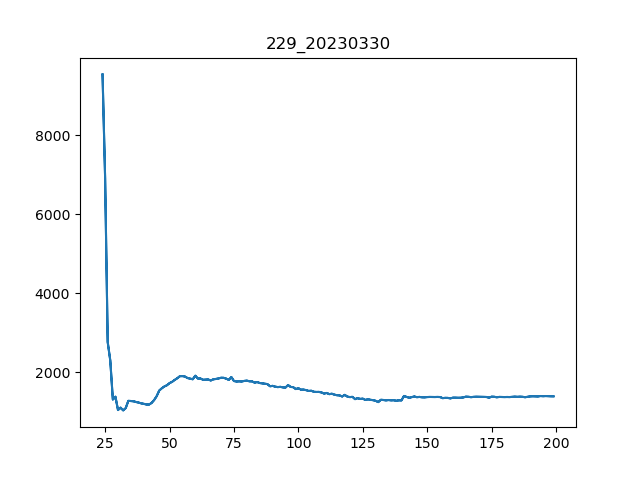

In [6]:
Ds={}
for plate in plates:
    fig,ax = plt.subplots()
    
    select = time_plate_info.loc[time_plate_info["unique_id"] == int(plate)]
    # Ds[plate] = select["density"].iloc[timestep[int(plate.split('_')[0])]]
    ax.plot(select["timestep"],select["density"])
    ax.set_title(plate)
    # break

In [9]:
folders, time_hypha_info = get_time_hypha_info_from_analysis(analysis_folders)
folders,global_hypha_info = get_global_hypha_info_from_analysis(analysis_folders)

C:\Users\coren\AMOLF-SHIMIZU Dropbox\DATA\PRINCE_ANALYSIS\218_20230227\Analysis_218_20230227_200_Version1\Analysis_218_20230227_200_Version1\time_hypha_info\hyph_info_88.json


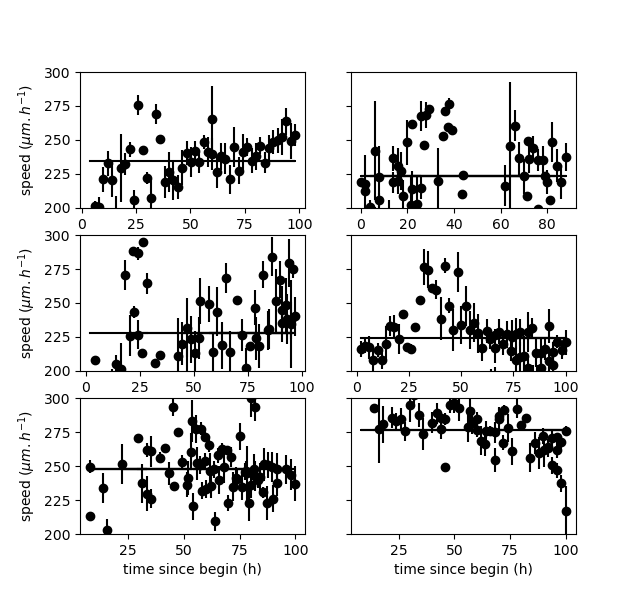

In [10]:
ncols = 2
fig,axs = gridplot(len(plates),ncols = ncols,subh = height*2,subw = width*2)
ax_list = list(axs)
maxi = 100
for j in range(len(plates)):
    plate_id = plates[j]
    plate = int(plate_id.split('_')[0])
    ax = ax_list[j]
    hull_speeds = []
    hull_time = []
    time_hypha_plate = time_hypha_info.loc[time_hypha_info['unique_id'].astype(str).str[:len(str(plate))]==str(plate)]

    data,dy,select_movements = get_average_time_data(int(plate_id),time_hypha_info,2)
    hyphae_hull = get_hyphae_hull(plate_id,analysis_folders)
    if len(hyphae_hull)>0:
        label = 'hull pusher'
        for t in range(1,min(len(time_hypha_plate['timestep'].unique())-1,maxi)):
            select = time_hypha_plate.loc[time_hypha_plate['timestep']==t]
            select = select.loc[select['end'].isin(hyphae_hull[t-1]) |select['end'].isin(hyphae_hull[t]) |select['end'].isin(hyphae_hull[t+1])]
            select = select.loc[select['speed'].between(150,350)]
            if len(select)>0:
                time = select['time_since_emergence'].iloc[0]
                if time<=100:
                    ax.scatter(select['time_since_emergence'].iloc[0],np.mean(select["speed"]),color='black')
                    ax.errorbar(select['time_since_emergence'].iloc[0],np.mean(select["speed"]),np.std(select["speed"])/np.sqrt(len(select)),color='black',label=label)
                    label = None
                    hull_speeds.append(np.mean(select["speed"]))
                    hull_time.append(select['time_since_emergence'].iloc[0])

        # ax.plot(data.index/pd.Timedelta(hours = 1),data)
        # ax.errorbar(data.index,data, yerr=dy,label='average')
        # ax.set_xlim(0,150)
        ax.set_ylim(200,300)

        # ax.legend()
        # ax.set_title(f'{plate}')
        # ax.set_xlabel('time since begin (h)')
        # ax.set_ylabel('speed ($\mu m.h^{-1}$)')
        if j//ncols == len(plates)//ncols-1:
            ax.set_xlabel('time since begin (h)')
        if j%ncols == 0:
            ax.set_ylabel('speed ($\mu m.h^{-1}$)') 
        if j%ncols !=0:
            ax.set_yticklabels([])
        ax.plot(hull_time,[np.mean(hull_speeds)]*len(hull_time),
                color="black",
                label= f'mean hull pusher speed {int(np.nanmean(hull_speeds))}$\pm${int(2*np.nanstd(hull_speeds)/np.sqrt(len(hull_speeds)))} $\mu m.h^{-1}$')
        # ax.legend()
    # break


In [21]:
plates

['28_20230227', '206_20230303', '218_20230227', '219_20230307', '229_20230330']

In [132]:
shifts = {int(plate.split('_')[0]) : 0 for plate in plates}
shifts = {30: 20, 32: 30, 33: 20,3 : 80,16:5,12 : 0,480:120,28: 30}
shifts

{30: 20, 32: 30, 33: 20, 3: 80, 16: 5, 12: 0, 480: 120, 28: 30}

In [11]:
table_err

,ring_density_incr-100_index-0-new,ring_density_incr-100_index-1-new,ring_density_incr-100_index-2-new,ring_density_incr-100_index-3-new,ring_density_incr-100_index-4-new,ring_density_incr-100_index-5-new,ring_density_incr-100_index-6-new,ring_density_incr-100_index-7-new,ring_density_incr-100_index-8-new,ring_density_incr-100_index-9-new,...,folder_analysis,time_since_begin_h,folder,unique_id,datetime,PrincePos,root,strain,medium,timestep
timestep,,,,,,,,,,,,,,,,,,,,,
0,77.406857,34.143003,2.809441,5.426106,22.186003,5.208955,0.000000,9.437513,0.261803,7.480829,...,Analysis_3_20220426_200_Version1,0 days 06:02:00,20220427_0101_Plate16,320220426,2022-04-27 01:01:00,16,'Carrot','Agg','001P100N100C',0
1,290.477595,15.614696,3.596084,2.280231,8.389792,8.337824,6.466936,0.877205,2.094427,0.960653,...,Analysis_3_20220426_200_Version1,3 days 20:26:00,20220430_1525_Plate16,320220426,2022-04-30 15:25:00,16,'Carrot','Agg','001P100N100C',1
2,335.089126,16.364314,3.580030,2.385797,5.194402,1.870329,0.000000,1.300683,1.848024,0.940214,...,Analysis_3_20220426_200_Version1,4 days 12:26:00,20220501_0725_Plate16,320220426,2022-05-01 07:25:00,16,'Carrot','Agg','001P100N100C',2
3,398.866971,12.276772,3.323167,2.343571,6.572509,1.905289,0.000000,1.361180,1.955825,1.369441,...,Analysis_3_20220426_200_Version1,4 days 22:26:00,20220501_1725_Plate16,320220426,2022-05-01 17:25:00,16,'Carrot','Agg','001P100N100C',3
4,1227.105509,23.351325,3.499760,4.074858,8.117200,3.233747,0.000000,3.433198,1.709422,3.863051,...,Analysis_3_20220426_200_Version1,5 days 14:26:00,20220502_0925_Plate16,320220426,2022-05-02 09:25:00,16,'Carrot','Agg','001P100N100C',4
5,2726.840705,222.608418,5.329910,5.320539,9.434730,9.246769,0.142354,3.660061,2.479432,5.661721,...,Analysis_3_20220426_200_Version1,6 days 02:38:00,20220502_2137_Plate16,320220426,2022-05-02 21:37:00,16,'Carrot','Agg','001P100N100C',5
6,5517.920697,3519.119582,417.354461,29.241854,77.598005,8.425222,0.345717,68.043863,1.647821,9.443014,...,Analysis_3_20220426_200_Version1,7 days 08:51:00,20220504_0350_Plate16,320220426,2022-05-04 03:50:00,16,'Carrot','Agg','001P100N100C',6
7,6105.352551,5255.108820,3160.042878,991.478302,184.757156,39.713911,12.506810,63.264610,2.217629,11.834427,...,Analysis_3_20220426_200_Version1,8 days 08:37:00,20220505_0336_Plate16,320220426,2022-05-05 03:36:00,16,'Carrot','Agg','001P100N100C',7
8,6124.370544,5621.771290,4805.411909,2950.386911,1487.355681,376.915083,13.462615,127.361052,3.572846,10.935092,...,Analysis_3_20220426_200_Version1,9 days 00:36:00,20220505_1935_Plate16,320220426,2022-05-05 19:35:00,16,'Carrot','Agg','001P100N100C',8


In [107]:
len(table_err)

113

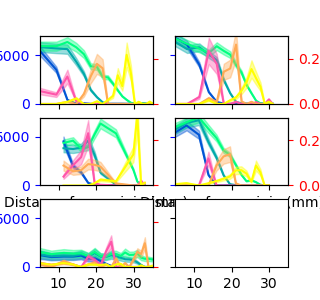

In [206]:
cmap2 = mpl.cm.get_cmap("spring")
cmap = mpl.cm.get_cmap("winter")

suffix = ""
suffix = "-new"
max_indexes = {int(plate.split('_')[0]) : 20 for plate in plates}
ncols =2
fig,axs = gridplot(len(plates),ncols = ncols,subh = height,subw = width,sharex=True,sharey=True)
timestep_lists = {}
for j,ax in enumerate(axs):
    if j<len(plates):
        ax2 = ax.twinx()
        plate = plates[j]
        plate = int(plate.split('_')[0])
        table = time_plate_info.loc[time_plate_info["Plate"]==plate]
        table_err = time_plate_info_long.loc[time_plate_info_long["Plate"]==plate]

        # table = table.dropna()
        ts = list(table['timestep'])
        table = table.set_index('timestep',drop=False)
        table_err = table_err.set_index('timestep',drop=False)

        ts = list(table.index)
        ts.sort()
        dic = {}
        ax.axis([5,35,0,7000])


        # popt_f,r_squared_dens,popt_f2,r_squared_tips =get_wave_fit(time_plate_info_long,plate,timesteps,max_indexes,lamb = -1,C =1000)
        # t0 = max(0,popt_f[-1]/popt_f[0])
        shift = shifts[plate]
        timesteps = table.loc[table['time_since_begin_h'].between(shift,shift+400)]
        timesteps = timesteps.loc[timesteps['timestep']<=timestep[plate]]
        timestep_lists[plate] = timesteps['time_since_begin_h']
        indexes = range(0,len(timesteps),len(timesteps)//5) 
        indexes = list(indexes)[2:5]
        timesteps_select = timesteps.iloc[indexes]['timestep']
        
        lines = []
        markers = ['o','v','s']
        for i,t in enumerate(timesteps_select):
     #     ax.set_yscale("log")

            maxL = np.sqrt(1900)
            X = np.linspace(0,maxL,100)
            incr = 100
            def density(x,suffix = ''):
                area = x**2
                index = int(area//incr)
                column = f"ring_density_incr-100_index-{index}{suffix}"
                if len(suffix) == 0:
                    return(float(table[column][t]))
                else:
                    return(float(table_err[column][t]))
            xvalues = np.array([np.sqrt(100*i) for i in range(max_indexes[plate])])
            yvalues = [density(x,suffix) for x in xvalues]
            xvalues,yvalues = zip(*[(x,y) for x,y in zip(xvalues,yvalues) if not(np.isnan(y))])

            dic[t] = {}
            dic[t]['distance_origin'] = xvalues
            dic[t]['ring_density'] = yvalues
            xvalues = np.array(xvalues)
            yvalues = np.array(yvalues) 
            X = np.sqrt((xvalues**2+table["area_sep_comp"][0])/(np.pi/2))
            Y = yvalues
            line = {"type" : "data hypha density","x" : np.sqrt((xvalues**2+table["area_sep_comp"][0])/(np.pi/2)),"y" : yvalues,"time_h":table["time_since_begin"][t]/1e6}
            lines.append(line)
            scat1 = ax.plot(np.sqrt((xvalues**2+table["area_sep_comp"][0])/(np.pi/2)), yvalues,color=cmap((i+1)/len(timesteps_select)),label=f't={int(table["time_since_begin"][t]/pd.Timedelta(days=1))} days')
            table = table.sort_values('area_sep_comp')
            xs, ys  = np.sqrt((xvalues**2+table["area_sep_comp"][0])/(np.pi/2)), yvalues
            err = 0*ys + 500*ys/np.max(ys)
            ax.fill_between(xs, ys-err, ys+err,color=cmap((i+1)/len(timesteps_select)),alpha = 0.4)
            # draw_error_band(ax, xs, ys,err,color=cmap((len(timesteps)-i)/len(timesteps)),alpha = 0.6)
            #     ellipses = [Ellipse((x,ys[j]), 0.5, np.std(ys)*ys[j]/2000, facecolor=cmap((len(timesteps)-i)/len(timesteps)), edgecolor="white") for j,x in enumerate(xs)]

        #     for ellipse in ellipses:
        #         ax.add_artist(ellipse)
            xs = np.linspace(np.min(X),np.max(X),1000)
            ts = [table['time_since_begin_h'][t] for x in xs]
            xt = np.array((xs,ts))
            line = {"type" : "fit hypha density","x" : xs,"y" : wave(xt,*popt_f),"time_h":table["time_since_begin"][t]/pd.Timedelta(days=1)}
            lines.append(line)
            # ax.plot(xs,wave(xt,*popt_f),color=cmap((len(timesteps)-i)/len(timesteps)))
            def density(x):
                area = x**2
                index = int(area//incr)
                column = f"ring_active_tips_density_incr-100_index-{index}"
                return(float(table_err[column][t]))
            xvalues = np.array([np.sqrt(100*i) for i in range(max_indexes[plate])])
            yvalues = [density(x) for x in xvalues]

            xvalues,yvalues = zip(*[(x,y) for x,y in zip(xvalues,yvalues) if not(np.isnan(y))])
            dic[t]['tip_density'] = yvalues
            xvalues = np.array(xvalues)
            yvalues = np.array(yvalues) 
            X = np.sqrt((xvalues**2+table["area_sep_comp"][0])/(np.pi/2))
            Y = yvalues
            # scat2 = ax2.plot(np.sqrt((xvalues**2+table["area_sep_comp"][0])/(np.pi/2)), yvalues,color=cmap2((i+1)/len(timesteps)))

            line = {"type" : "data tip density","x" : (np.sqrt((xvalues**2+table["area_sep_comp"][0])/(np.pi/2))),"y" : yvalues,"time_h":int(table["time_since_begin"][t]//pd.Timedelta(days=1))}
            lines.append(line)
            xs = np.linspace(np.min(X),np.max(X),1000)
            ts = [table['time_since_begin_h'][t] for x in xs]
            xt = np.array((xs,ts))
            # ax2.plot(xs,dwave(xt,*popt_f2),color=cmap2((len(timesteps)-i)/len(timesteps)))
            xs, ys  = np.sqrt((xvalues**2+table["area_sep_comp"][0])/(np.pi/2)), yvalues
            err = abs(ys)/4

            # err = 0*ys + 80
            ax2.fill_between(xs, ys-err, ys+err,color=cmap2((i+1)/len(timesteps_select)),alpha = 0.4)
            ax2.plot(xs,ys,color=cmap2((i+1)/len(timesteps_select)))
            if j//ncols == len(plates)//ncols-1:
                ax.set_xlabel('Distance from origin (mm)')
            # if j%ncols == 0:
            #     ax.set_ylabel('Network density ($\mu m.mm^{-2}$)') 
            ax2.set_ylim((0,0.30))
            # if j%ncols == ncols-1:
            #     ax2.set_ylabel('Active tip density ($mm^{-2}$)')
            if j%ncols < ncols-1:
                ax2.set_yticklabels([])
            ax.tick_params(axis='y', colors='blue')
            ax2.tick_params(axis='y', colors='red')
            right = 0.90
            top = 0.90
            fontsize = 10
    # if plate==16:
    #     break
    # break
# plt.tight_layout()
# fig.text(0.5, 0.0, 'Distance from origin (mm)', ha='center', va='center',size = 20)
# fig.text(0.04, 0.5, 'Network density ($\mu m.mm^{-2}$)', ha='center', va='center', rotation='vertical',size = 20)
# plt.tight_layout()


# plt.savefig(os.path.join(path_figure,'FigureS2B_agg.pdf'), transparent=True, bbox_inches='tight')

In [78]:
plates[j]

'3_20220426'

In [57]:
folders, time_hypha_info = get_time_hypha_info_from_analysis(analysis_folders)
folders,global_hypha_info = get_global_hypha_info_from_analysis(analysis_folders)

In [186]:
shift

30

In [185]:
hyphae_hull[0]

array([ 364,    1, 2411, 1295, 1328, 1337, 1272,  843,   56], dtype=int64)

KeyError: 'timestep'

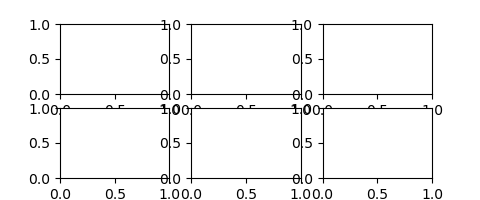

In [251]:
ncols = 3
fig,axs = gridplot(len(plates),ncols = ncols,subh = height,subw = width)
ax_list = list(axs)
j = 3
plate_id = plates[j]
plate = int(plate_id.split('_')[0])
mini = shifts[plate]//2
maxi = timestep[plate]

ax = ax_list[j]
hull_speeds = []
hull_time = []
time_hypha_plate = time_hypha_info.loc[time_hypha_info['unique_id'].astype(str).str[:len(str(plate))]==str(plate)]
timestep_select = timestep_lists[plate]

# data,dy,select_movements = get_average_time_data(int(plate_id),time_hypha_info,2)
hyphae_hull = get_hyphae_hull(plate_id,analysis_folders)
all_hyphae_hull = np.concatenate(hyphae_hull)
if len(hyphae_hull)>0:
    label = 'hull pusher'
    for t in timestep_select:
        select = time_hypha_plate.loc[time_hypha_plate['timestep']==t]
        select = select.loc[select['end'].isin(hyphae_hull[t-1]) |select['end'].isin(hyphae_hull[t]) |select['end'].isin(hyphae_hull[t+1])]
        # select = select.loc[select['end'].isin(all_hyphae_hull)]
        
        # select = select.loc[select['speed'].between(150,350)]
        if len(select)>0:
            time = select['time_since_begin_h_float'].iloc[0]
            # if time<=100:
            ax.scatter(select['time_since_begin_h_float'].iloc[0],np.mean(select["speed"]),color='black')
            ax.errorbar(select['time_since_begin_h_float'].iloc[0],np.mean(select["speed"]),np.std(select["speed"])/np.sqrt(len(select)),color='black',label=label)
            label = None
            hull_speeds.append(np.mean(select["speed"]))
            hull_time.append(select['time_since_begin_h_float'].iloc[0])
        # break


In [293]:
def get_hyphae_hull(plate_id, analysis_folders):
    selection = analysis_folders.loc[analysis_folders["unique_id"] == plate_id]
    analysis_dirs = selection["total_path"]
    folders = pd.DataFrame()
    for analysis_dir in analysis_dirs:
        hyphae_hull = {}
        path_time_hypha = os.path.join(analysis_dir, "time_hull_info")
        if os.path.exists(path_time_hypha):
            json_paths = os.listdir(path_time_hypha)
            for path in json_paths:
                index = int(path.split("_")[-1].split(".")[0])
                hyphae = np.load(os.path.join(path_time_hypha, path))
                hyphae_hull[index] = hyphae

    return hyphae_hull

In [294]:
hyphae_hull = get_hyphae_hull(plate_id,analysis_folders)


In [295]:
hyphae_hull

{0: array([ 364,    1, 2411, 1295, 1328, 1337, 1272,  843,   56], dtype=int64),
 1: array([      1, 3170393, 3170344,      56,     364], dtype=int64),
 10: array([     56,     364, 3501885,  222705, 3406939, 3953439], dtype=int64),
 100: array([3901653,   11460,    8957, 3921607, 3833355, 3933845, 3749969,
        3855754,    6453, 3857361, 3310618,    7249,    7589, 3770345,
        3735764,    6634, 3734931, 3855282, 3894511, 3817100, 3949336,
          11269,    7522, 3951104, 3912365,    8868, 3936125, 3899362,
           8164, 3916361,    4861,   21261], dtype=int64),
 101: array([  43264, 3933845, 3749969, 3855754, 3770202, 3857302,   27808,
        3296679,    7249,   28829, 3770345,    6933, 3734931, 3855282,
        3913202, 3817100,   21519,   31370,   31281,   11460,    8957,
        3921607, 3833355,   43144,   28232,   42613,   29209,   29691,
          30215, 3916361,   25141], dtype=int64),
 102: array([  64512, 3933845, 3749969, 3855754, 3770202, 3857302,   27808,
     